# MuML/BV - Kapitel 1d: Bilder und Bildeigenschaften

In [93]:
# Bibliotheken einbinden
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [120]:
# Bilder laden
file_monke = "../../img/mandril_gray.png"
file_color_wheel = "../../img/color_wheel.png"

img_monke = cv2.imread(file_monke)
img_color_wheel = cv2.imread(file_color_wheel)

Ein Python-Algorithmus zum invertieren eines 8-bit-Bildes:

In [95]:
def MyInvert(src):
    # Zielbild anlegen
    dst = np.copy(src)

    # Größe des Quellbildes bestimmen
    ysize = src.shape[0]
    xsize = src.shape[1]
    for y in range(1,ysize-1):
        for x in range(1,xsize-1):
            dst[y][x] = 255 - src[y][x]
    return dst

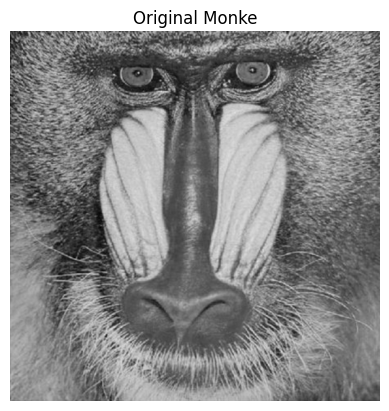

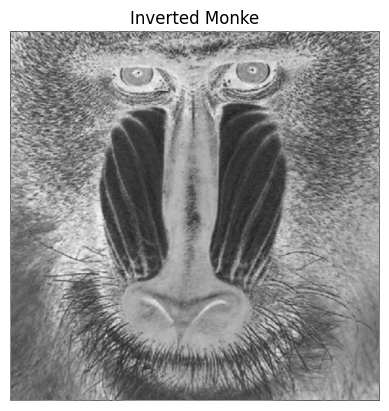

In [96]:
inverted = MyInvert(img_monke)

plt.imshow(img_monke)
plt.title('Original Monke')
plt.axis('off')
plt.show()

plt.imshow(inverted)
plt.title('Inverted Monke')
plt.axis('off')
plt.show()

### Übung 1
Geben Sie einen Algorithmus an, der die Graustufen eines 8-bit Grauwertbildes auf 16 Graustufen reduziert.

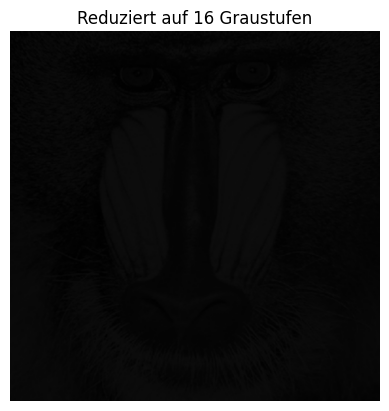

In [ ]:
# Reduktion auf 16 Graustufen

plt.imshow(img_16_gray, cmap='gray')
plt.title('Reduziert auf 16 Graustufen')
plt.axis('off')
plt.show()

### Übung 2
Geben Sie einen Algorithmus an, der ein 8-bit Grauwertbild dadurch glättet, dass der Grauwert eines Bildpunktes (x,y) durch den Mittelwert über seine 8-er Nachbarschaft ersetzt wird.

In [ ]:
def smoothWithMean8Neighborhood(src, k_len):
    """
    - Kernel ist die Nachbarschaft eines Pixels
    - Nachbarschaft = 8 bzw. 3x3
    - k_len ist Länge des Kernels entweder in x- oder y-Richtung, wenn dieser quadratisch ist
    - Wenn Kernel auf (0, 0) von Bild gelegt wird, zeigen erste Zeile sowie erste Spalte von Kernel ins Nichts
    - Workaround: Startposition bei (k_half, k_half)
    - Aber wenn Startposition innerhalb des Bildes ist, bleibt ein unveränderter Rand übrig
    - Lösungen:
        - Entweder dst als Null-Pixel-Matrix initialisieren -> schwarzer Rand
        - Oder Gebiet um den Rand mit Nullen füllen
    - 
    Smoothes an 8-bit gray value image by replacing each pixel with the mean value of its 8-bit neighborhood.
    """
    dst = np.copy(src).astype(float)
    k_half = k_len // 2
    height = dst.shape[0]
    width = dst.shape[1]

    for i in range(k_half, height-k_half):    # Zeilen abzählen
        for j in range(k_half, width-k_half):    # Spalten abzählen
            summepxl = 0    # gewichtete Summe für den aktuellen Pixelwert des neuen Bildes
            for k in range(-k_half, k_half+1):  # Kernel horizontal ablaufen (Werte von -1 bis 1, exklusive 3)
                # print("k: ", k)  # Debugging
                for l in range(-k_half, k_half+1):  # Kernel vertikal ablaufen
                    # print("l: ", l)  # Debugging
                    summepxl += dst[i+l, j+k]
            dst[i, j] = summepxl/9
    return dst.astype(np.uint8)

def smoothWithMean8Neighborhood_alt(src, k_len):
    """
    Das Bild wird, wie bekannt, in zwei Schleifen pixelweise durchlaufen.
    Für jeden Pixel wird die Nachbarschaft rund um den Pixel mittels Slicing-Operator definiert.
    Die Nachbarschaftsgrenzen mit min und max so gesetzt, dass sie nicht über den Bildrand hinaus laufen.
    Der Mittelwert der Nachbarschaft wird einfach mit np.mean berechnet. 
    """
    dst = np.zeros_like(src, dtype=float)
    k_half = k_len // 2
    height, width, _ = dst.shape

    for i in range(height):
        for j in range(width):
            # Dynamisch Nachbarschaftsgrenzen berechnen, sodass wir nicht über den Bildrand hinausgehen
            i_min = max(i - k_half, 0)
            i_max = min(i + k_half + 1, height)
            j_min = max(j - k_half, 0)
            j_max = min(j + k_half + 1, width)

            neighborhood = src[i_min:i_max, j_min:j_max]
            dst[i, j] = np.mean(neighborhood)

    return dst.astype(np.uint8)

In [98]:
# Nur für alle Fälle auch noch der Code für ne 4er-Nachbarschaft

def smoothWithMean4Neighborhood(src):
    dst = np.copy(src).astype(float)
    height, width, _ = dst.shape

    for i in range(height):
        for j in range(width):
            neighbors = [src[i, j]]  # Zähle den aktuellen Pixel selbst mit

            if i > 0:
                neighbors.append(src[i-1, j])  # oben
            if i < height - 1:
                neighbors.append(src[i+1, j])  # unten
            if j > 0:
                neighbors.append(src[i, j-1])  # links
            if j < width - 1:
                neighbors.append(src[i, j+1])  # rechts

            dst[i, j] = np.mean(neighbors)

    return np.round(dst).astype(np.uint8)

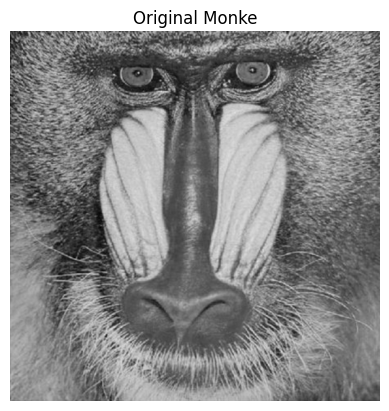

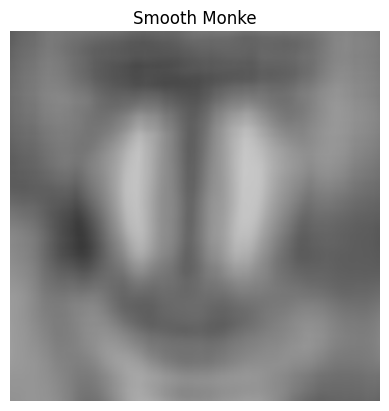

In [99]:
k_len = 69
# smooth = smoothWithMean8Neighborhood(img_monke, k_len)
smooth = smoothWithMean8Neighborhood_alt(img_monke, k_len)

plt.imshow(img_monke)
plt.title('Original Monke')
plt.axis('off')
plt.show()

plt.imshow(smooth)
plt.title('Smooth Monke')
plt.axis('off')
plt.show()

## Übung 3
Geben Sie einen Algorithmus an, der den Kontrast eines Bildes entsprechend eines als Parameter übergebenden Verstärkungsfaktors verändert.

In [100]:
def changeContrast(src, factor):
    """
    Kontrastverstärkung durch lineare Transformation
    Die Grauwerte werden relativ zum Mittelwert verschoben.
    Formel: new_val = alpha * (val - mean) + mean
    """
    dst = np.copy(src).astype(float)
    height, width, _ = dst.shape

    mean = np.mean(dst)

    for i in range(height):
        for j in range(width):
            dst[i, j] = factor * (dst[i, j] - mean) + mean
    
    return dst.astype(np.uint8)

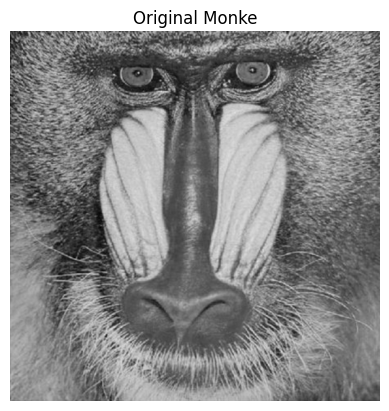

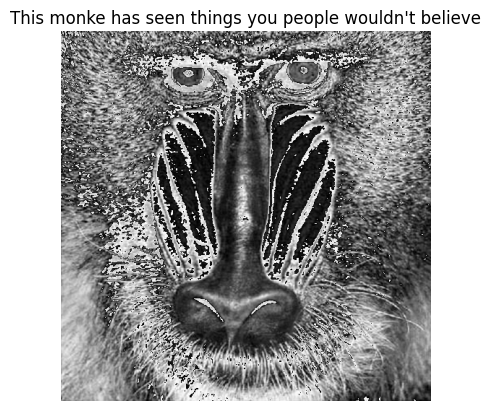

In [102]:
contrast_changed = changeContrast(img_monke, 2)

plt.imshow(img_monke)
plt.title('Original Monke')
plt.axis('off')
plt.show()

plt.imshow(contrast_changed)
plt.title('This monke has seen things you people wouldn\'t believe')
plt.axis('off')
plt.show()

## Übung 4
Geben Sie einen Algorithmus an, der das Histogramm eines Bildes berechnet.

In [ ]:
def calcGrayHist(src):
    height, width = src.shape
    hist = [0] * 256
    
    for i in range(height):
        for j in range(width):
            hist[src[i, j]] += 1
    
    return hist

def calcColorHist(src):
    height, width, channel = src.shape
    hist = [[0] * 256 for _ in range(channel)]

    for c in range(channel):
        for i in range(height):
            for j in range(width):
                hist[c][src[i, j, c]] += 1
    
    return hist

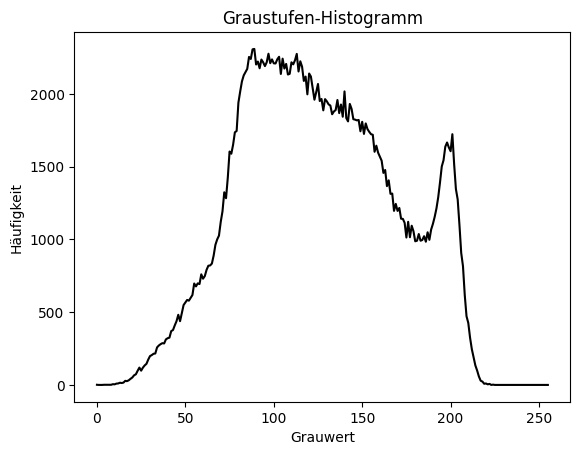

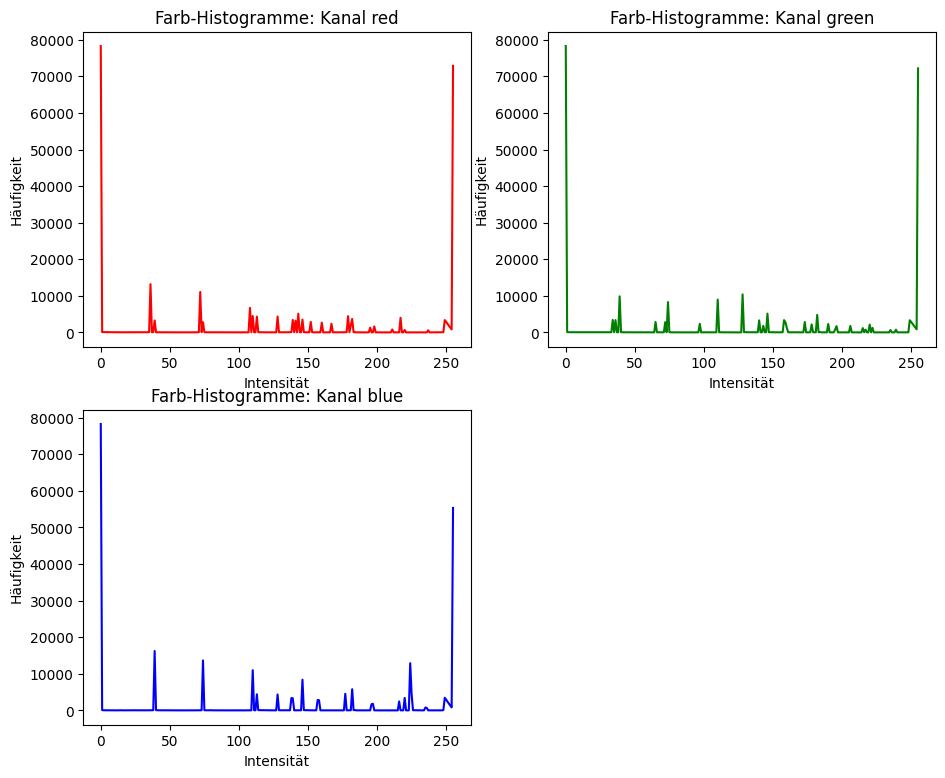

In [132]:
# Graustufen-Histogramm plotten
gray_img = cv2.cvtColor(img_monke, cv2.COLOR_BGR2GRAY)
gray_hist = calcGrayHist(gray_img)

plt.figure()
plt.plot(gray_hist, color='black')
plt.title('Graustufen-Histogramm')
plt.xlabel('Grauwert')
plt.ylabel('Häufigkeit')
plt.show()

# Farb-Histogramm plotten
color_hist = calcColorHist(img_color_wheel)
colors = ['red', 'green', 'blue']

plt.figure(figsize=(11, 9))
for c in range(3):
    plt.subplot(2, 2, c+1)
    plt.plot(color_hist[c], color=colors[c])
    plt.title(f'Farb-Histogramme: Kanal {colors[c]}')
    plt.xlabel('Intensität')
    plt.ylabel('Häufigkeit')
plt.show()